In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot, autocorrelation_plot

In [16]:
# Load the dataset
file_path = 'data/AirQualityUCI.csv'
df = pd.read_csv(file_path, delimiter=';')
df.columns = df.columns.str.strip(' ;')

# Replace '/' in Date and '.' in Time to ensure proper formatting
df['Date'] = df['Date'].str.replace('/', '-')
df['Time'] = df['Time'].str.replace('.', ':')  # Replace periods with colons in Time

# Convert to datetime and set as index
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True, errors='coerce')
df.set_index('datetime', inplace=True)

# Remove rows with NaT (Not a Time) in datetime index due to parsing issues
df = df[~df.index.isna()]

# Ensure the index is sorted
df = df.sort_index()

# Clean up the CO(GT) column
df['CO(GT)'] = df['CO(GT)'].str.replace(',', '.')
df['CO(GT)'] = pd.to_numeric(df['CO(GT)'], errors='coerce')
df['CO(GT)'] = df['CO(GT)'].ffill().bfill()

# Verify index is monotonic and has valid dates
print("Is index monotonic?:", df.index.is_monotonic_increasing)
print("Index head:", df.index[:5])


Is index monotonic?: True
Index head: DatetimeIndex(['2004-03-10 18:00:00', '2004-03-10 19:00:00',
               '2004-03-10 20:00:00', '2004-03-10 21:00:00',
               '2004-03-10 22:00:00'],
              dtype='datetime64[ns]', name='datetime', freq=None)


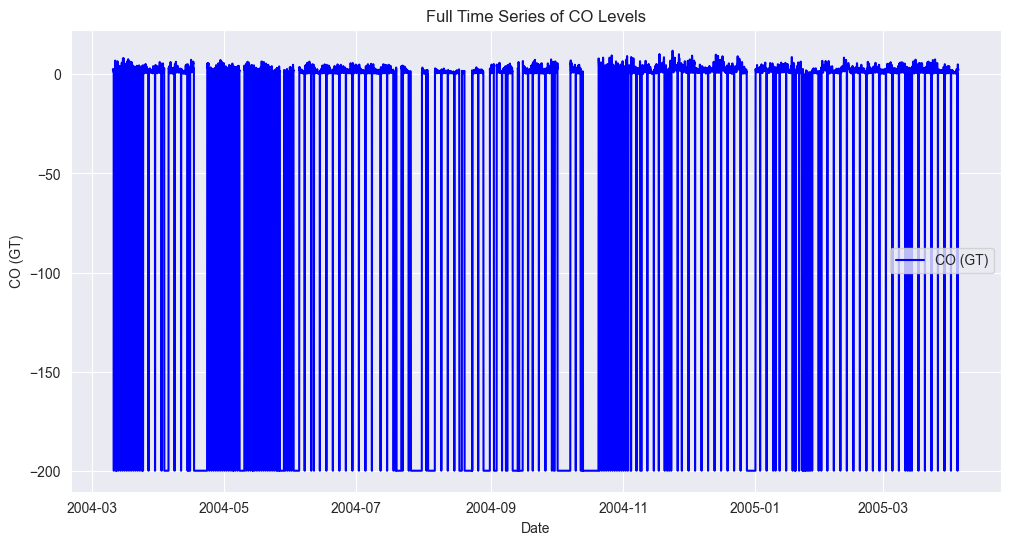

In [17]:
# 1. 
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['CO(GT)'], label='CO (GT)', color='blue')
plt.title('Full Time Series of CO Levels')
plt.xlabel('Date')
plt.ylabel('CO (GT)')
plt.legend()
plt.grid(True)
plt.show()

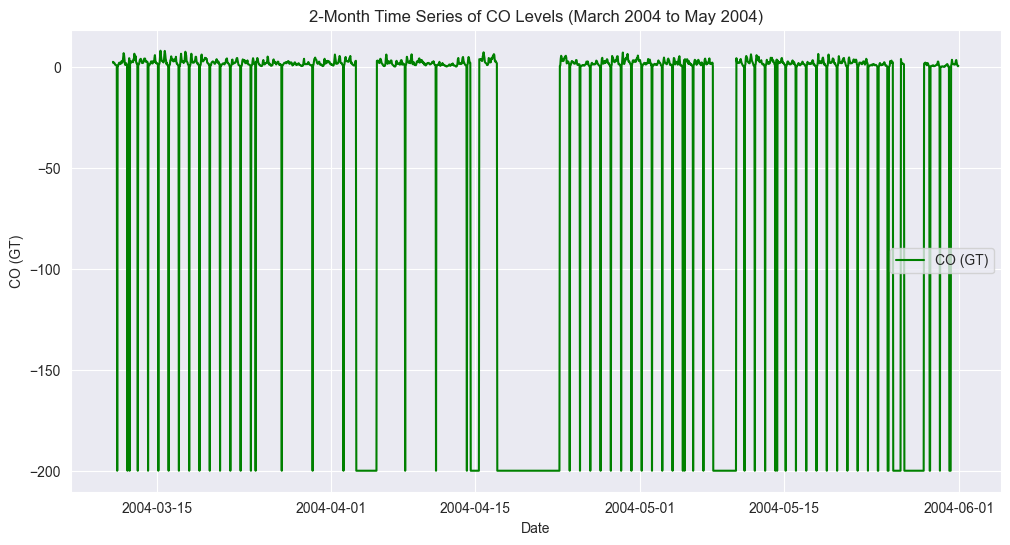

In [18]:
# 2. 
df_2months = df.loc['2004-03':'2004-05']

plt.figure(figsize=(12, 6))
plt.plot(df_2months.index, df_2months['CO(GT)'], label='CO (GT)', color='green')
plt.title('2-Month Time Series of CO Levels (March 2004 to May 2004)')
plt.xlabel('Date')
plt.ylabel('CO (GT)')
plt.legend()
plt.grid(True)
plt.show()

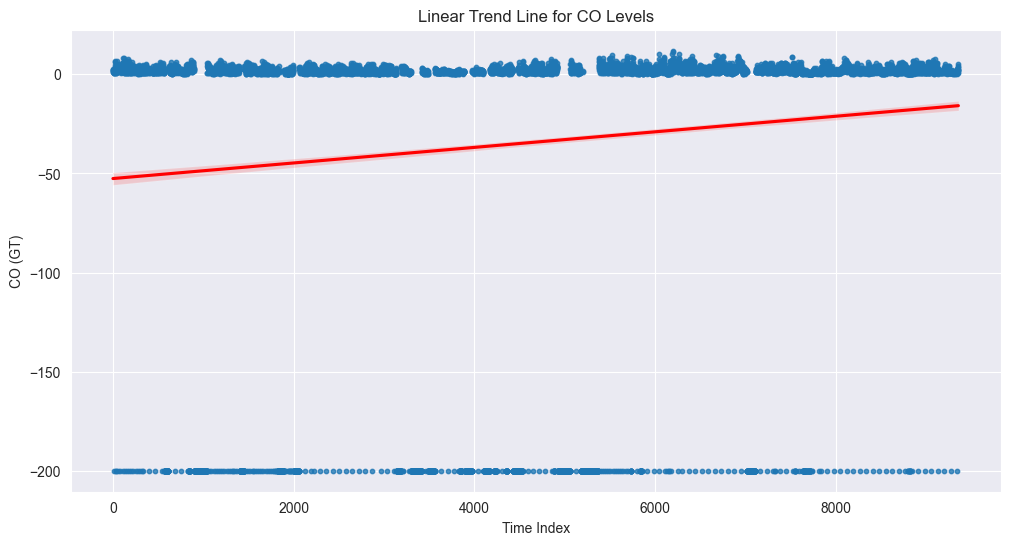

In [19]:
# 3. 
plt.figure(figsize=(12, 6))
sns.regplot(x=df.index.factorize()[0], y=df['CO(GT)'], scatter_kws={"s": 10}, line_kws={"color": "red"})
plt.title('Linear Trend Line for CO Levels')
plt.xlabel('Time Index')
plt.ylabel('CO (GT)')
plt.grid(True)
plt.show()

/var/folders/lg/zjtzqdq15v77l_2rk_z7jhwh0000gn/T/ipykernel_9140/777492685.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_mean = df['CO(GT)'].resample('Y').mean()


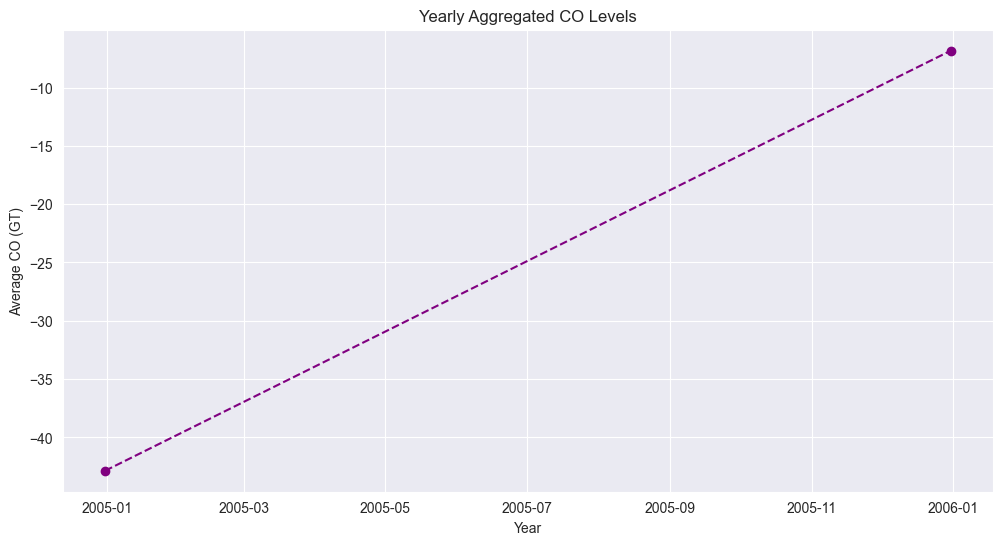

In [20]:
# 4. 
yearly_mean = df['CO(GT)'].resample('Y').mean()

plt.figure(figsize=(12, 6))
plt.plot(yearly_mean.index, yearly_mean, marker='o', color='purple', linestyle='--')
plt.title('Yearly Aggregated CO Levels')
plt.xlabel('Year')
plt.ylabel('Average CO (GT)')
plt.grid(True)
plt.show()

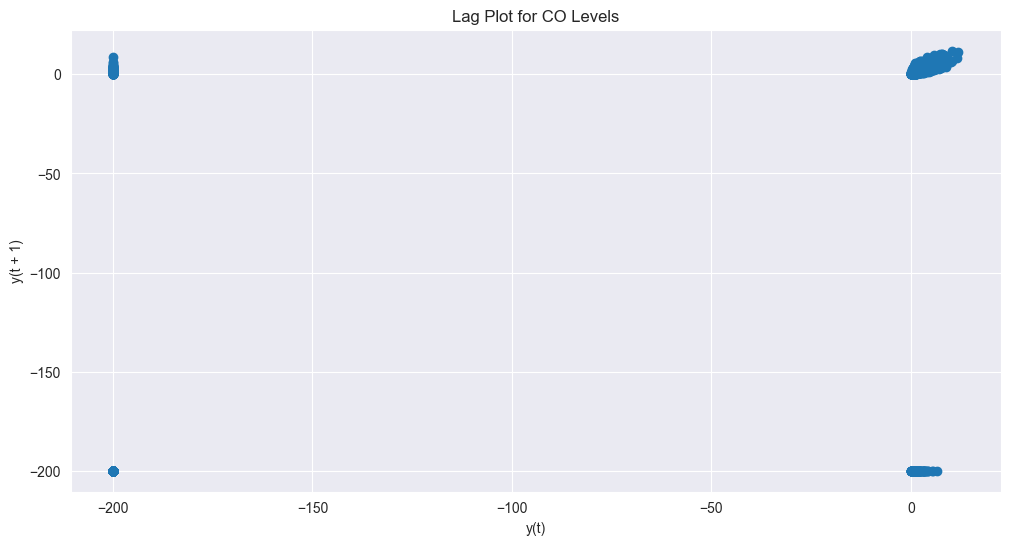

In [21]:
# 5. Lag Scatter Plot
plt.figure(figsize=(12, 6))
lag_plot(df['CO(GT)'])
plt.title('Lag Plot for CO Levels')
plt.grid(True)
plt.show()

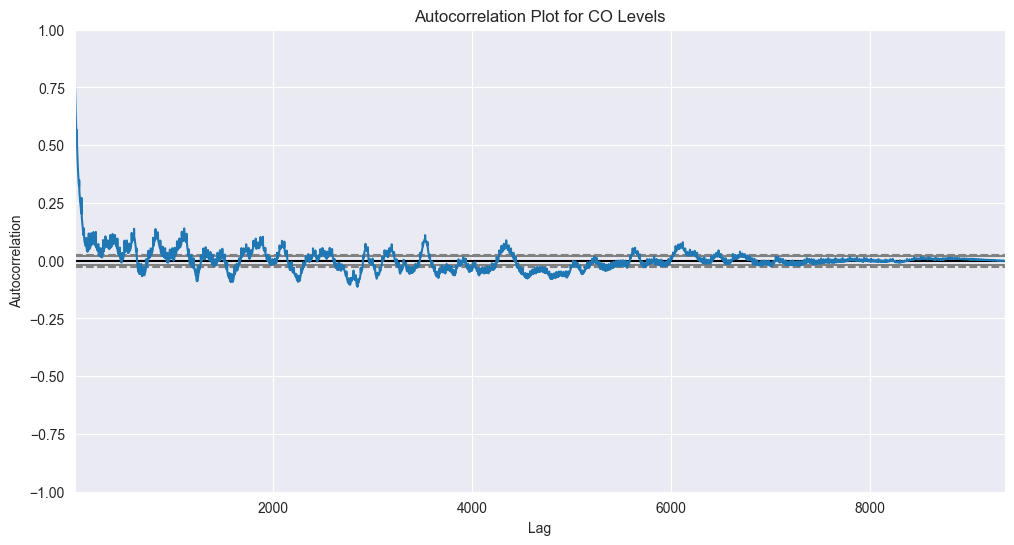

In [22]:
# 6. Autocorrelation Plot
plt.figure(figsize=(12, 6))
autocorrelation_plot(df['CO(GT)'])
plt.title('Autocorrelation Plot for CO Levels')
plt.grid(True)
plt.show()